# 4. Borel-Cantelli Lemma

**Goal:** Simulate the two halves of the Borel-Cantelli lemma.

## Background

Let $(A_n)_{n \geq 1}$ be a sequence of events in a probability space.

**First Borel-Cantelli (BC1):** If $\sum_{n=1}^{\infty} P(A_n) < \infty$, then
$P(A_n \text{ i.o.}) = 0$ — almost surely, only finitely many $A_n$ occur.

**Second Borel-Cantelli (BC2):** If the $A_n$ are **independent** and $\sum_{n=1}^{\infty} P(A_n) = \infty$,
then $P(A_n \text{ i.o.}) = 1$ — almost surely, infinitely many $A_n$ occur.

Here "i.o." means "infinitely often": $\limsup_n A_n = \bigcap_{n=1}^\infty \bigcup_{k=n}^\infty A_k$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Case 1: $\sum P(A_n) < \infty$ (First Borel-Cantelli)

Let $P(A_n) = 1/n^2$. Then $\sum P(A_n) = \pi^2/6 < \infty$.

The lemma predicts: with probability 1, each sample path triggers only finitely many events.

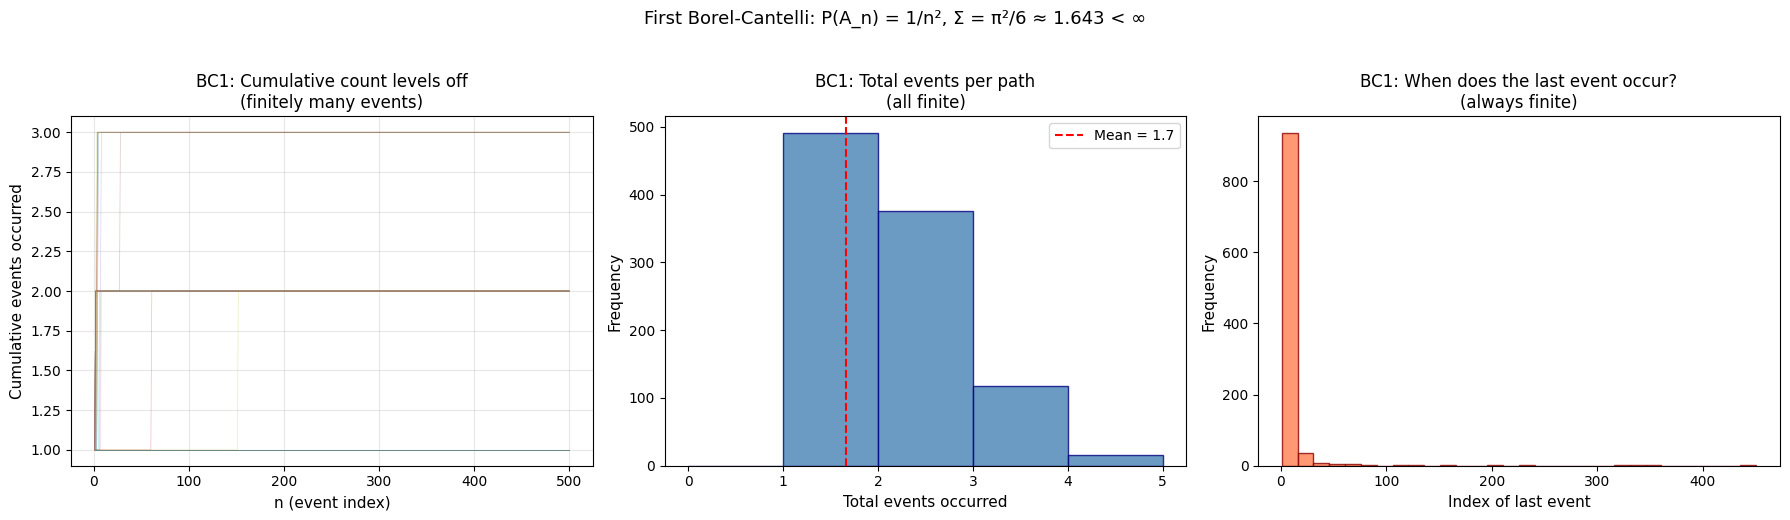

In [2]:
np.random.seed(42)

N_events = 500        # number of events
N_paths = 1000        # number of sample paths

# p_n = 1/n^2 (convergent series)
probs_convergent = 1.0 / np.arange(1, N_events + 1)**2

# Simulate: each path independently decides if each event occurs
U = np.random.uniform(0, 1, size=(N_paths, N_events))
occurrences = (U < probs_convergent[np.newaxis, :]).astype(int)

# Cumulative count of events that have occurred
cum_count = np.cumsum(occurrences, axis=1)

# For each path, find when the last event occurs
last_occurrence = np.zeros(N_paths, dtype=int)
for i in range(N_paths):
    indices = np.where(occurrences[i] == 1)[0]
    last_occurrence[i] = indices[-1] + 1 if len(indices) > 0 else 0

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Cumulative event counts for sample paths
ax = axes[0]
for i in range(min(50, N_paths)):
    ax.plot(range(1, N_events + 1), cum_count[i], alpha=0.3, linewidth=0.5)
ax.set_xlabel('n (event index)', fontsize=11)
ax.set_ylabel('Cumulative events occurred', fontsize=11)
ax.set_title('BC1: Cumulative count levels off\n(finitely many events)', fontsize=12)
ax.grid(True, alpha=0.3)

# Plot 2: Histogram of total events per path
ax = axes[1]
total_per_path = cum_count[:, -1]
ax.hist(total_per_path, bins=range(int(total_per_path.max()) + 2),
        color='steelblue', edgecolor='navy', alpha=0.8)
ax.axvline(np.mean(total_per_path), color='red', linestyle='--',
           label=f'Mean = {np.mean(total_per_path):.1f}')
ax.set_xlabel('Total events occurred', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('BC1: Total events per path\n(all finite)', fontsize=12)
ax.legend()

# Plot 3: Histogram of last occurrence index
ax = axes[2]
ax.hist(last_occurrence, bins=30, color='coral', edgecolor='darkred', alpha=0.8)
ax.set_xlabel('Index of last event', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('BC1: When does the last event occur?\n(always finite)', fontsize=12)

plt.suptitle(f'First Borel-Cantelli: P(A_n) = 1/n², Σ = π²/6 ≈ {np.sum(probs_convergent):.3f} < ∞',
             fontsize=13, y=1.03)
plt.tight_layout()
plt.show()

## Case 2: $\sum P(A_n) = \infty$ with Independence (Second Borel-Cantelli)

Let $P(A_n) = 1/n$. Then $\sum P(A_n) = \infty$ (harmonic series).

With independence, BC2 predicts: with probability 1, infinitely many events occur.
The cumulative count should grow without bound.

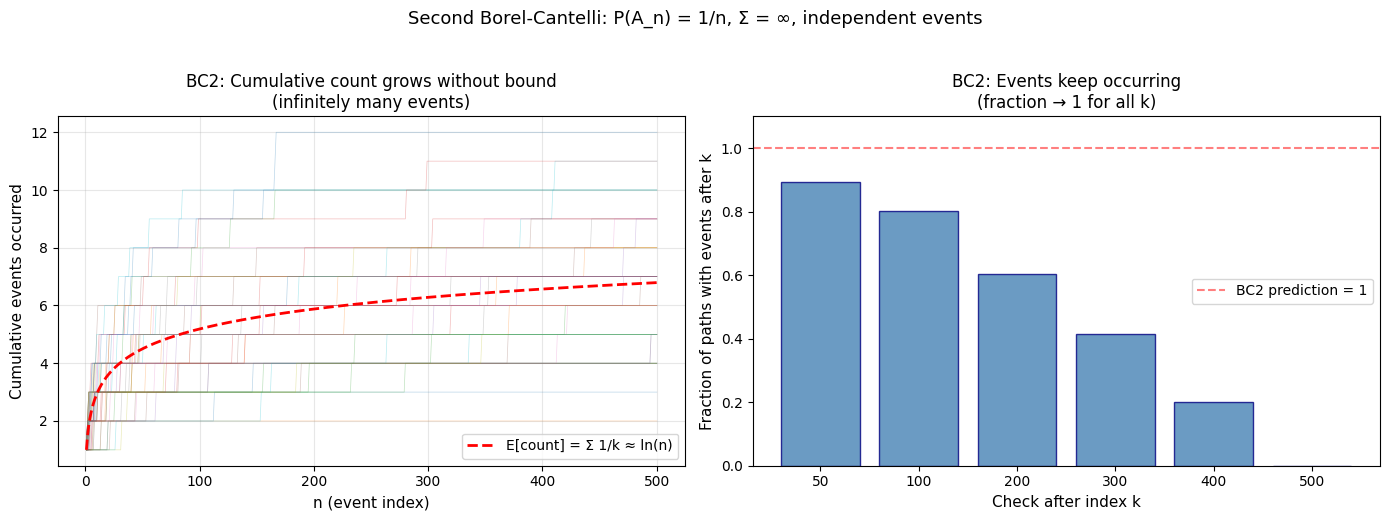

In [3]:
# p_n = 1/n (divergent series)
probs_divergent = 1.0 / np.arange(1, N_events + 1)

U2 = np.random.uniform(0, 1, size=(N_paths, N_events))
occurrences2 = (U2 < probs_divergent[np.newaxis, :]).astype(int)
cum_count2 = np.cumsum(occurrences2, axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Cumulative counts (should grow without bound)
ax = axes[0]
for i in range(min(50, N_paths)):
    ax.plot(range(1, N_events + 1), cum_count2[i], alpha=0.3, linewidth=0.5)
# Overlay expected cumulative: sum of 1/k ≈ ln(n)
expected = np.cumsum(probs_divergent)
ax.plot(range(1, N_events + 1), expected, 'r--', linewidth=2, label='E[count] = Σ 1/k ≈ ln(n)')
ax.set_xlabel('n (event index)', fontsize=11)
ax.set_ylabel('Cumulative events occurred', fontsize=11)
ax.set_title('BC2: Cumulative count grows without bound\n(infinitely many events)', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: Fraction of paths where the last event is beyond index k
ax = axes[1]
check_indices = [50, 100, 200, 300, 400, 500]
fracs = []
for k in check_indices:
    # Fraction of paths with at least one event after index k
    has_event_after_k = np.any(occurrences2[:, k-1:] == 1, axis=1)
    fracs.append(np.mean(has_event_after_k))

ax.bar([str(k) for k in check_indices], fracs, color='steelblue', edgecolor='navy', alpha=0.8)
ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='BC2 prediction = 1')
ax.set_xlabel('Check after index k', fontsize=11)
ax.set_ylabel('Fraction of paths with events after k', fontsize=11)
ax.set_title('BC2: Events keep occurring\n(fraction → 1 for all k)', fontsize=12)
ax.set_ylim(0, 1.1)
ax.legend()

plt.suptitle(f'Second Borel-Cantelli: P(A_n) = 1/n, Σ = ∞, independent events', fontsize=13, y=1.03)
plt.tight_layout()
plt.show()

## Comparing Convergent vs. Divergent Series

Let's compare several probability sequences side by side, showing the sharp dichotomy.

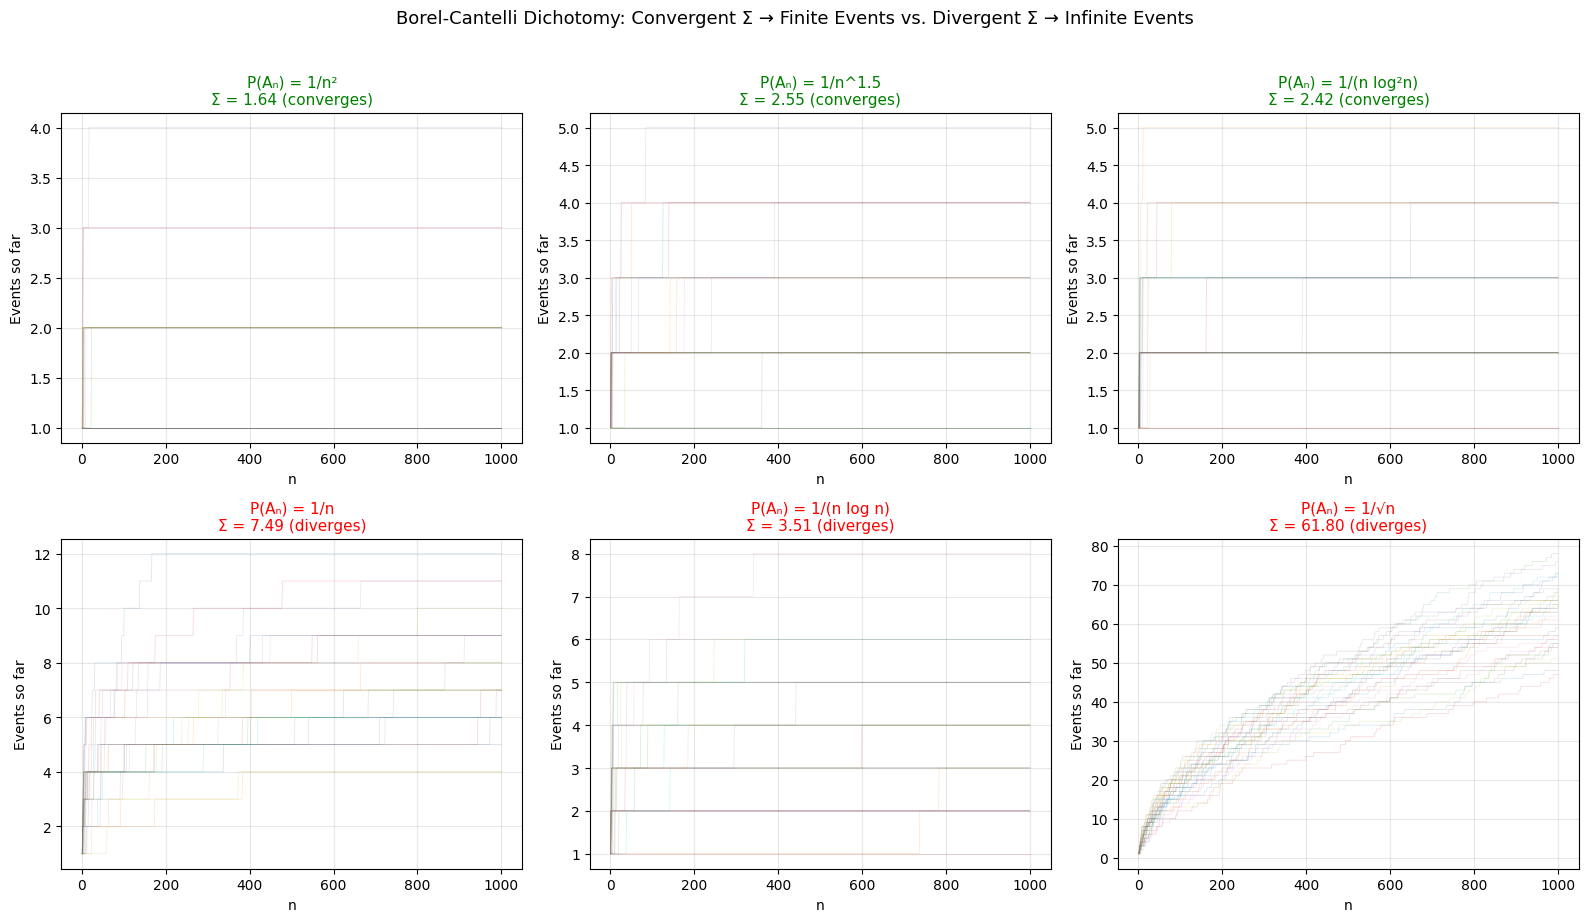

In [4]:
cases = [
    ('1/n²', lambda n: 1/n**2, 'converges'),
    ('1/n^1.5', lambda n: 1/n**1.5, 'converges'),
    ('1/(n log²n)', lambda n: 1/(n * max(np.log(n), 1)**2), 'converges'),
    ('1/n', lambda n: 1/n, 'diverges'),
    ('1/(n log n)', lambda n: 1/(n * max(np.log(n), 1)), 'diverges'),
    ('1/√n', lambda n: 1/np.sqrt(n), 'diverges'),
]

N_events = 1000
N_paths = 500
ns = np.arange(1, N_events + 1)

fig, axes = plt.subplots(2, 3, figsize=(16, 9))

for idx, (name, prob_fn, series_type) in enumerate(cases):
    ax = axes[idx // 3][idx % 3]
    probs = np.array([prob_fn(n) for n in ns])
    probs = np.clip(probs, 0, 1)
    
    U = np.random.uniform(0, 1, size=(N_paths, N_events))
    occ = (U < probs[np.newaxis, :]).astype(int)
    cum = np.cumsum(occ, axis=1)
    
    for i in range(min(30, N_paths)):
        ax.plot(ns, cum[i], alpha=0.2, linewidth=0.5)
    
    color = 'green' if series_type == 'converges' else 'red'
    sum_val = np.sum(probs)
    ax.set_title(f'P(Aₙ) = {name}\nΣ = {sum_val:.2f} ({series_type})',
                fontsize=11, color=color)
    ax.set_xlabel('n')
    ax.set_ylabel('Events so far')
    ax.grid(True, alpha=0.3)

plt.suptitle('Borel-Cantelli Dichotomy: Convergent Σ → Finite Events vs. Divergent Σ → Infinite Events',
             fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

## The Role of Independence (BC2)

The independence assumption in BC2 is crucial. Without it, $\sum P(A_n) = \infty$ does **not**
guarantee infinitely many events. For a counterexample, let all $A_n$ be the *same* event $A$
with $P(A) = 1/2$. Then $\sum P(A_n) = \infty$, but either all occur or none do — not i.o. a.s.

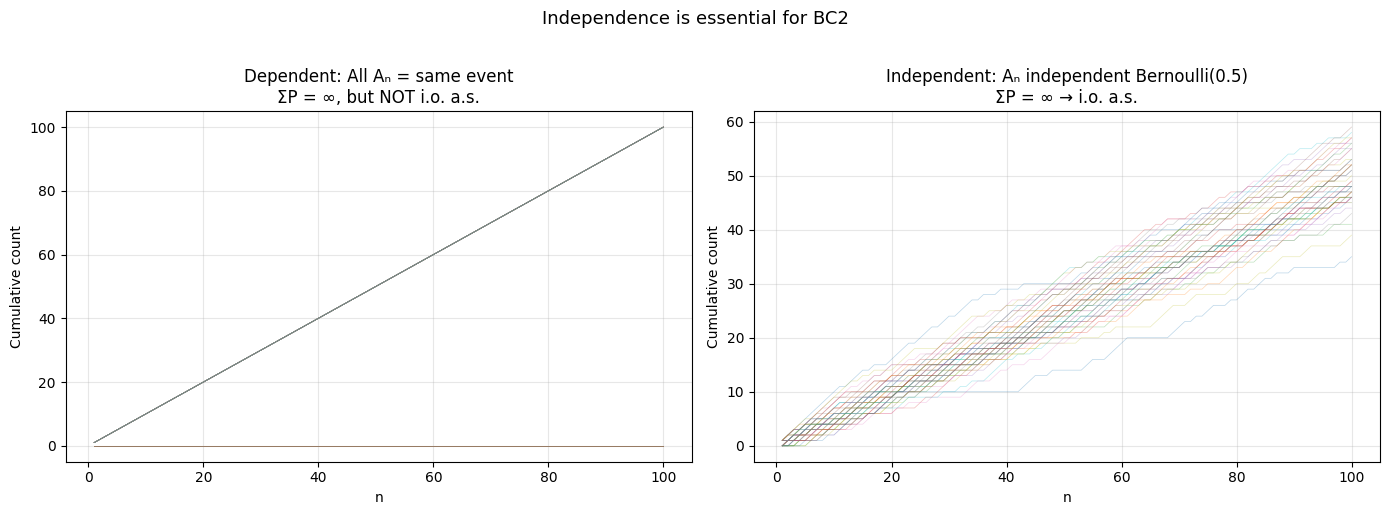

Dependent case: fraction with 0 events = 0.507 (half get 0, half get 100)
Independent case: fraction with 0 events = 0.000000 (essentially 0)


In [5]:
# Dependent events: A_n are all the same event
N_paths = 10000
N_events = 100

# All events are the same Bernoulli(0.5)
single_outcome = np.random.binomial(1, 0.5, size=N_paths)  # 0 or 1
# Every A_n for a given path has the same outcome
occ_dep = np.tile(single_outcome[:, np.newaxis], (1, N_events))
cum_dep = np.cumsum(occ_dep, axis=1)

# Independent events with same probability
occ_indep = np.random.binomial(1, 0.5, size=(N_paths, N_events))
cum_indep = np.cumsum(occ_indep, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.set_title('Dependent: All Aₙ = same event\nΣP = ∞, but NOT i.o. a.s.', fontsize=12)
for i in range(50):
    ax1.plot(range(1, N_events+1), cum_dep[i], alpha=0.3, linewidth=0.5)
ax1.set_xlabel('n')
ax1.set_ylabel('Cumulative count')
ax1.grid(True, alpha=0.3)

ax2.set_title('Independent: Aₙ independent Bernoulli(0.5)\nΣP = ∞ → i.o. a.s.', fontsize=12)
for i in range(50):
    ax2.plot(range(1, N_events+1), cum_indep[i], alpha=0.3, linewidth=0.5)
ax2.set_xlabel('n')
ax2.set_ylabel('Cumulative count')
ax2.grid(True, alpha=0.3)

plt.suptitle('Independence is essential for BC2', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

print(f"Dependent case: fraction with 0 events = {np.mean(cum_dep[:,-1]==0):.3f} "
      f"(half get 0, half get {N_events})")
print(f"Independent case: fraction with 0 events = {np.mean(cum_indep[:,-1]==0):.6f} "
      f"(essentially 0)")

## Key Takeaways

1. **BC1 (no independence needed):** $\sum P(A_n) < \infty \Rightarrow$ only finitely many events occur a.s.
2. **BC2 (requires independence):** $\sum P(A_n) = \infty$ + independence $\Rightarrow$ infinitely many events occur a.s.
3. **The boundary is sharp:** the convergence/divergence of $\sum P(A_n)$ cleanly separates the two regimes.
4. **Independence is essential for BC2:** without it, dependent events can prevent the conclusion despite a divergent sum.
5. Borel-Cantelli is a workhorse in probability theory — it's the engine behind many "almost sure" results.